In [ ]:
# Importing the Pandas library with the alias "pd" to use its data manipulation and analysis functions
import pandas as pd
# Importing the NumPy library with the alias "np" to use its powerful tools for scientific computing.
import numpy as np
#Importing the Pyplot module from the Matplotlib library with the alias "plt" to create visualizations.
import matplotlib.pyplot as plt
# Importing the Seaborn library with the alias "sns" to create higher-level statistical visualizations.
import seaborn as sns

In [ ]:
#ignore warning messages that may appear during code execution.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the csv file and store it in a variable
dataset=pd.read_csv('50_Startups.csv')

In [ ]:
dataset.shape

(50, 5)

In [ ]:
#provide descriptive statistics for the numerical columns of a Pandas DataFrame.
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#calculates the number of missing values in each column of the dataset
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


<Axes: >

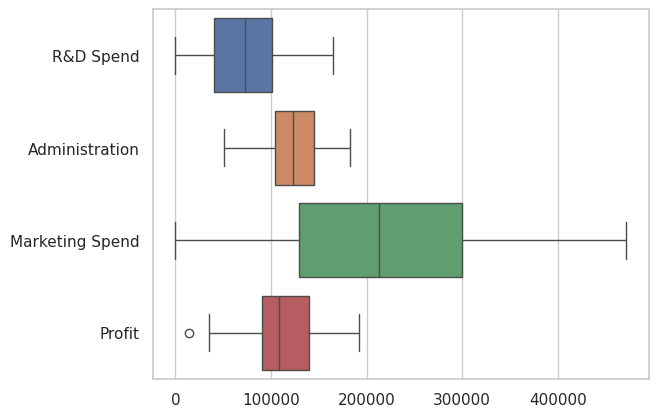

In [ ]:
#create a white grid plot with a horizontal box plot
#showing the distribution of the data in the 'dataset' variable
sns.set(style='whitegrid')
sns.boxplot(data=dataset,orient='h')

In [ ]:
#The OneHotEncoder is a class in scikit-learn used
#for one-hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder
#The ColumnTransformer class allows applying different
#transformers to specific columns of a dataset
from sklearn.compose import ColumnTransformer

In [ ]:
#generate summary statistics for the categorical columns of the dataset.
dataset.describe(include="object")

,State
count,50
unique,3
top,New York
freq,17


In [ ]:
x1=dataset.iloc[:,0:4].values # first 4 columns of the dataset as a numpy array
y1=dataset.iloc[:,4].values # the values from the 5th column

In [ ]:
#This code applies one-hot encoding
ct=ColumnTransformer([('State',OneHotEncoder(),[3])],\
                    remainder='passthrough')
x1=ct.fit_transform(x1)

In [ ]:
x1=x1[:,1:]

In [ ]:
x1.shape

(50, 5)

In [ ]:
x1[0,:]

array([0.0, 1.0, 165349.2, 136897.8, 471784.1], dtype=object)

In [ ]:
x1[:5,:]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [76]:
profit_14681 = dataset[dataset['Profit'] == 14681.4]
rd_spend_0 = dataset[dataset['R&D Spend'] == 0]
#extraire la ligne "tous les informations" ayant un  profit =14681.4  aussi celle ayant spend==0.0
print("Observations pour Profit=14681.4 :\n", profit_14681)
print("Observations pour R&D Spend=0 :\n", rd_spend_0 )
profit_14681 = dataset[dataset['Profit'] == 14681.4]
rd_spend_0 = dataset[dataset['R&D Spend'] == 0]
#extraire la ligne "tous les informations" ayant un  profit =14681.4  aussi celle ayant spend==0.0
print("Observations pour Profit=14681.4 :\n", profit_14681)
print("Observations pour R&D Spend=0 :\n", rd_spend_0 )

Observations pour Profit=14681.4 :
     R&D Spend  Administration  Marketing Spend       State   Profit
49        0.0        116983.8         45173.06  California  14681.4
Observations pour R&D Spend=0 :
     R&D Spend  Administration  Marketing Spend       State    Profit
47        0.0       135426.92             0.00  California  42559.73
49        0.0       116983.80         45173.06  California  14681.40
Observations pour Profit=14681.4 :
     R&D Spend  Administration  Marketing Spend       State   Profit
49        0.0        116983.8         45173.06  California  14681.4
Observations pour R&D Spend=0 :
     R&D Spend  Administration  Marketing Spend       State    Profit
47        0.0       135426.92             0.00  California  42559.73
49        0.0       116983.80         45173.06  California  14681.40


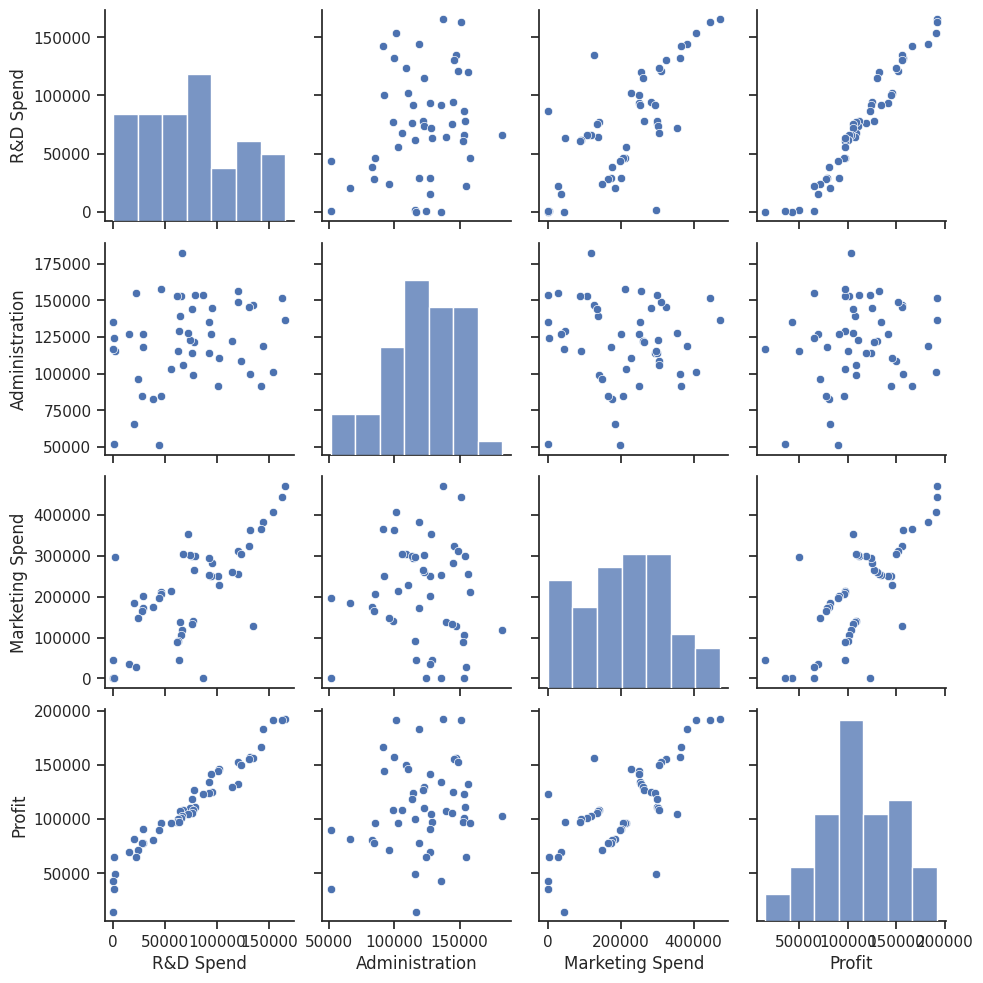

In [ ]:
sns.set(style="ticks")
sns.pairplot(dataset)

In [ ]:
#Computes the Pearson correlation coefficients
#between all pairs of columns in the dataset.
dataset_1 = dataset.drop("State", axis=1)
correlation=dataset_1.corr(method='pearson')

In [ ]:
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

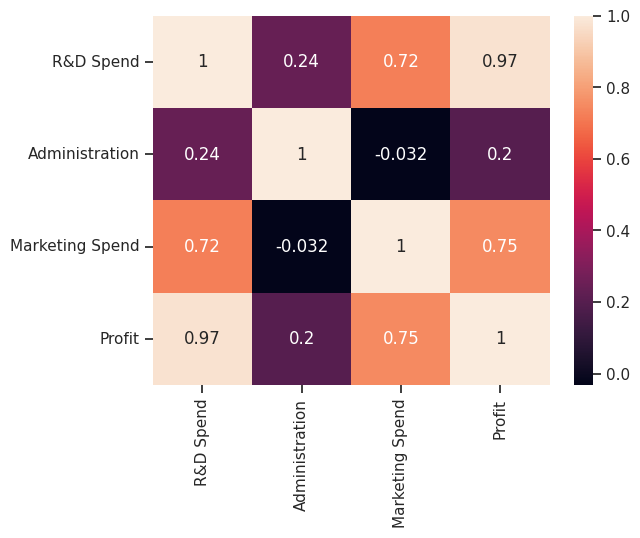

In [ ]:
#generates a heatmap using seaborn to visualize the correlation matrix
#calculated for the dataset, with correlation coefficients annotated on the heatmap.
sns.heatmap(correlation, annot = True)

In [ ]:
#These lines of code compute the kurtosis and skewness
#of the 'Administration' column in the dataset
print(dataset['Administration'].kurtosis())
print(dataset['Administration'].skew())

0.22507113536865386
-0.4890248099671768


In [ ]:
print(dataset['Profit'].kurtosis())
print(dataset['Profit'].skew())

-0.06385888546853113
0.023291019769116614


In [ ]:
from sklearn.model_selection import train_test_split
#Split the dataset into training and testing sets with 80-20 split ratio
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [ ]:
x_test[0,:]

array([1.0, 0.0, 66051.52, 182645.56, 118148.2], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Scale the training data to have zero mean and unit variance,
#and fit the scaler to the data
x_train_sc = scaler.fit_transform(x_train)
#Scale the testing data using the scaler that was fit to the training data
x_test_sc = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#fit a linear regression model to the training data
#x_train and y_train using the LinearRegression() class
#from the scikit-learn library.
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predict the values of the target variable y on the test set x_test,
#and storing the predicted values in y_pred.
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [ ]:
#array of coefficients for each feature used
#in the linear regression model.
regressor.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [ ]:
#the point where the regression line crosses the y-axis when x=0
regressor.intercept_

42554.167617767

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [ ]:
x_test[0]

array([1.0, 0.0, 66051.52, 182645.56, 118148.2], dtype=object)

In [ ]:
ypred1=42554.16761772438-9.59284160e+02+7.73467193e-01*66051.52+3.28845975e-02*182645.56+3.66100259e-02*118148.2
ypred1

103015.2016133082

In [ ]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
for i in range(10):
    print([y_test[i],y_pred[i]])

[103282.38, 103015.20159796216]
[144259.4, 132582.27760815847]
[146121.95, 132447.73845174976]
[77798.83, 71976.09851258763]
[191050.39, 178537.4822105438]
[105008.31, 116161.24230163351]
[81229.06, 67851.69209676176]
[97483.56, 98791.73374687924]
[110352.25, 113969.43533011667]
[166187.94, 167921.06569550227]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#calculates the mean squared error between the predicted and actual target values.
mean_squared_error(y_test,y_pred)

83502864.03250548

In [ ]:
#It is calculated as the square root of the mean of the squared
#differences between the predicted values and the actual values.
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse(y_test, y_pred)

In [ ]:
#calculates the mean absolute error between the predicted and actual target values.
mean_absolute_error(y_test,y_pred)

In [ ]:
#calculates the coefficient of determination
r2_score(y_pred,y_test)

In [47]:
y_pred_t=regressor.predict(x_train)

In [48]:
r2_score(y_pred_t,y_train)

0.9475731045123098

In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [50]:
y_pred_r = ridge.predict(x_test)

In [51]:
ridge.intercept_

42580.967043520795

In [52]:
ridge.coef_

array([-8.55246577e+02,  6.60540602e+02,  7.73903697e-01,  3.25917542e-02,
        3.64400165e-02])

In [53]:
r2_score(y_pred_r,y_test)

0.9299981254397197

In [54]:
from sklearn.linear_model import Lasso
lasso= Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [55]:
lasso.intercept_

42556.09122688208

In [56]:
lasso.coef_

array([-9.54987452e+02,  6.96280765e+02,  7.73491090e-01,  3.28690539e-02,
        3.66015591e-02])

In [57]:
l_y_pred = lasso.predict(x_test)

In [58]:
r2_score(l_y_pred,y_test)

0.9294075315664558

In [59]:
#The statsmodels.api library provides a wide range of tools
#for statistical modeling and data analysis
import statsmodels.api as sm

In [60]:
x1.shape

(50, 5)

In [61]:
x1[0:5,:]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [62]:
#adds a column of ones to a 2D NumPy array
x1=np.append(arr=np.ones((50,1)),values=x1,axis=1)

In [63]:
x1.shape

(50, 6)

In [64]:
x1[0:5,:]

array([[1.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [65]:
#converts the data type of x1 array to 64-bit floating point
x1=x1.astype('float64')

In [66]:
#selects columns 0 to 5 from the x1 array
x1_opt=x1[:,[0,1,2,3,4,5]]

In [67]:
#creates an ordinary least squares (OLS) model using the statsmodels library
regressor_OLS=sm.OLS(endog=y1,exog=x1_opt).fit()
#generates a summary of the regression results
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.34e-27
Time:                        17:41:07   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
x1_opt=x1[:,[0,3,4,5]]

In [69]:
regressor_OLS=sm.OLS(endog=y1,exog=x1_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.53e-30
Time:                        17:41:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
x1_opt=x1[:,[0,3,5]]

In [71]:
regressor_OLS=sm.OLS(endog=y1,exog=x1_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.16e-31
Time:                        17:41:41   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
x1_opt=x1[:,[0,3]]

In [73]:
regressor_OLS=sm.OLS(endog=y1,exog=x1_opt).fit()
regressor_OLS.summary()
#Adj. R-squared decreased so x1_opt=x1[:,[0,3,5]] is the most optimal

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 02 May 2024   Prob (F-statistic):           3.50e-32
Time:                        17:41:49   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""